# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()


NameError: name 'pd' is not defined

In [25]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [27]:
rows, columns = df.shape
print(f'The CSV file has {rows} rows and {columns} columns.')

The CSV file has 1898 rows and 9 columns.


#### Observations:
- The data consists of 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [31]:
column_data_types = df.dtypes
print(column_data_types)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [32]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations
- Provided are two set of codes to determine the data types of the DataFrame. The first code uses the dtypes attribute to obtain the data types of each column. The second code uses the info() function to provide a concise summary of the DataFrame. Both codes give the same output. Also, in the case of the info() function, it provides information about non-null values, memory usage, data types, and more.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [33]:
df.isnull()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [37]:
import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [1]:
# If there are missing values, treat them using an appropriate method
# For this example, we'll fill missing values with the mode for categorical columns and mean for numerical columns

# Fill missing values with the mode for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values with the mean for numerical columns
for column in df.select_dtypes(include=[float, int]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_treatment = df.isnull().sum()
print("Missing values after treatment:")
print(missing_values_after_treatment)

NameError: name 'df' is not defined

#### Observations:
- There are no missing values in the data. The missing_values variable returned a series where each column name is the index and the corresponding value is the number of missing values in that column. As all the values are zero, there are no missing values in the dataset. However, if there were any, the way to treat them would depend on the nature of the data and the specific requirements of the analysis. For example, if the missing values are categorical, you might replace them with the most frequent category, the code below will treat missing values with the mode of the respective column: 
    for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

- But for numerical columns, you might replace them with the mean or median, the code below will treat missing values with the mean of the respective column:
    df.fillna(df.mean(), inplace=True)
    Note: The codes provided here were run above, hence, providing in depth analysis should there be missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [4]:
# Write your code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Check the statistical summary of the data
stat_summary = df.describe()
print("Statistical summary of the data:")
print(stat_summary)

Statistical summary of the data:
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


In [44]:
# Extract the summary for 'food_preparation_time'
prep_time_summary = df['food_preparation_time'].describe()
min_prep_time = prep_time_summary['min']
avg_prep_time = prep_time_summary['mean']
max_prep_time = prep_time_summary['max']

# Print the minimum, average, and maximum preparation time
print(f"Minimum preparation time: {min_prep_time}")
print(f"Average preparation time: {avg_prep_time}")
print(f"Maximum preparation time: {max_prep_time}")

Minimum preparation time: 20.0
Average preparation time: 27.371970495258168
Maximum preparation time: 35.0


#### Observations:
- Minimum preparation time: 20
- Average preparation time: 27.371970495258168
- Maximum preparation time: 35

### **Question 5:** How many orders are not rated? [1 mark]

In [22]:
# Write the code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [34]:
df.isnull()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [30]:
# Verifying if there are any missing values in the data
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [7]:
# Check for missing values in the 'rating' column
missing_ratings = df['rating'].isnull().sum()
print(f'The number of orders that are not rated: {missing_ratings}')

The number of orders that are not rated: 0


#### Observations:

- There are 0 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [55]:
# Write your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Plot settings
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

<Figure size 1800x1200 with 0 Axes>

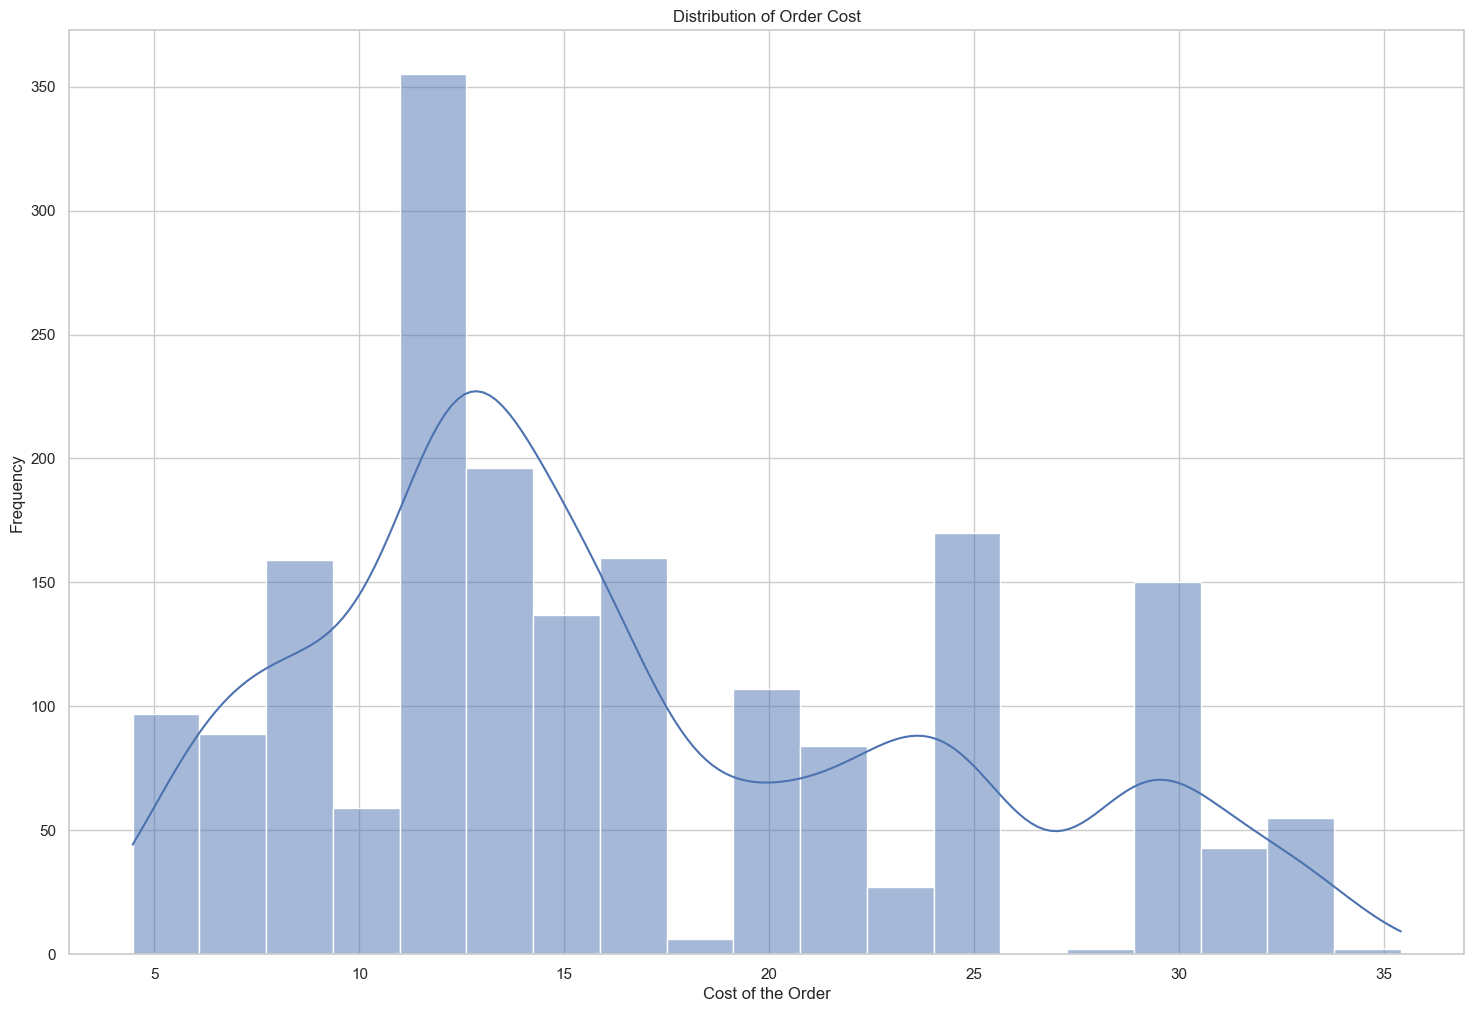

In [10]:
# Histogram for 'cost_of_the_order'
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
##plt.subplot(2, 3, 1)
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The histogram shows that most orders have a cost between 10 and 20 dollars, with a peak around 15 dollars. There are fewer orders with costs above 20 dollars, and very few orders exceeding 30 dollars.

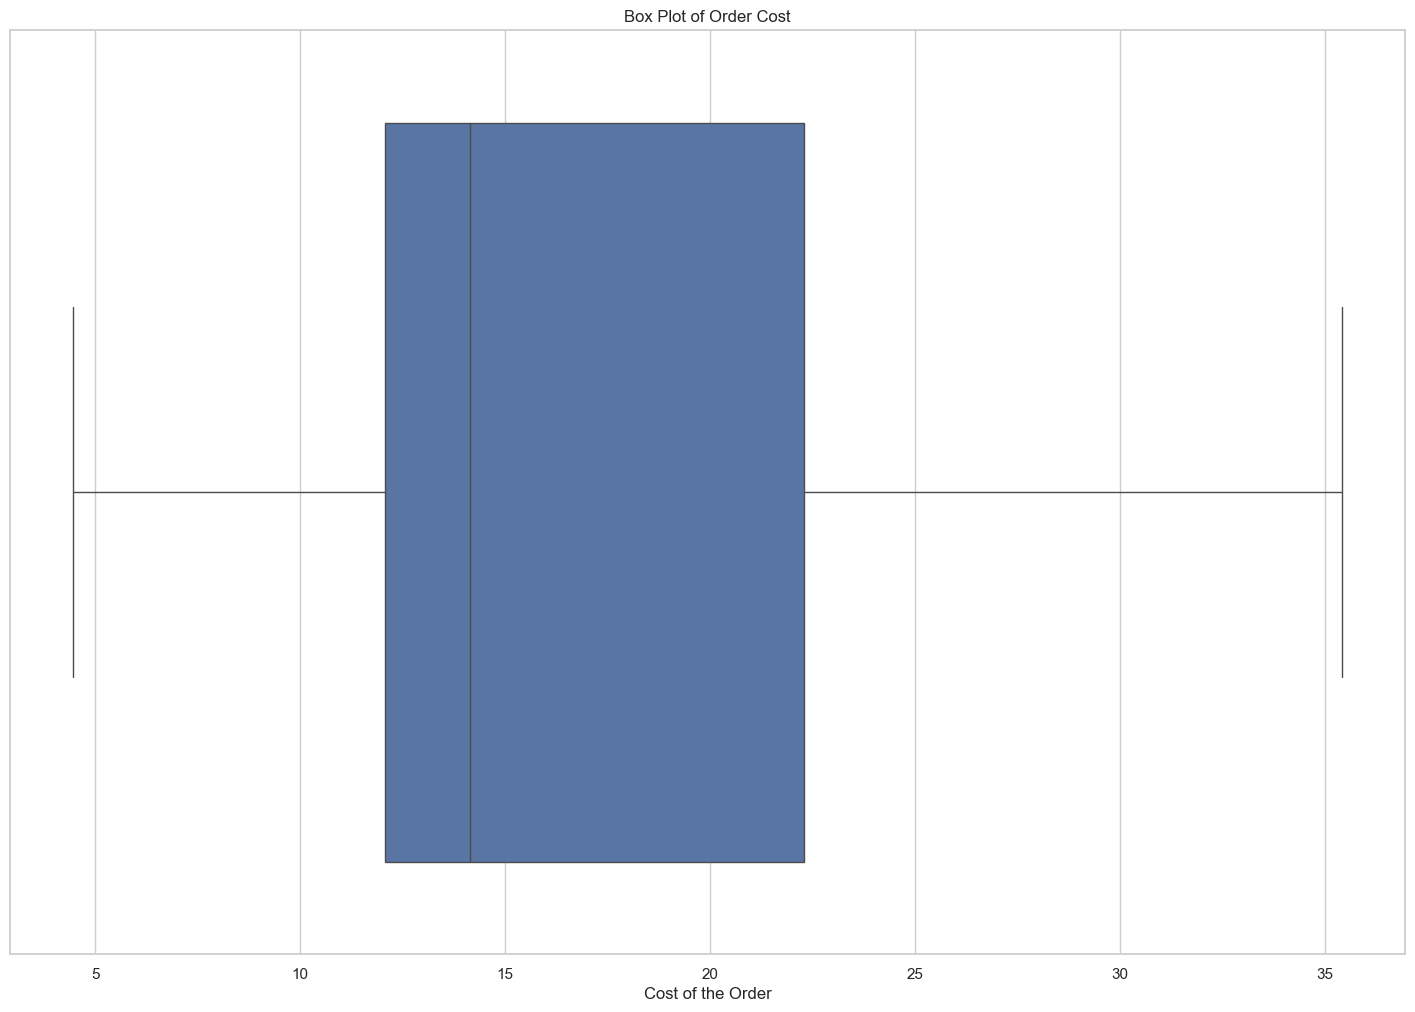

In [11]:
# Box plot for 'cost_of_the_order'
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
##plt.subplot(2, 3, 2)
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Box Plot of Order Cost')
plt.xlabel('Cost of the Order')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The box plot shows the median order cost is around 14 dollars. The interquartile range (IQR) is between approximately 12 and 22 dollars. There are some outliers with higher order costs, indicating that a few orders are significantly more expensive than the majority.

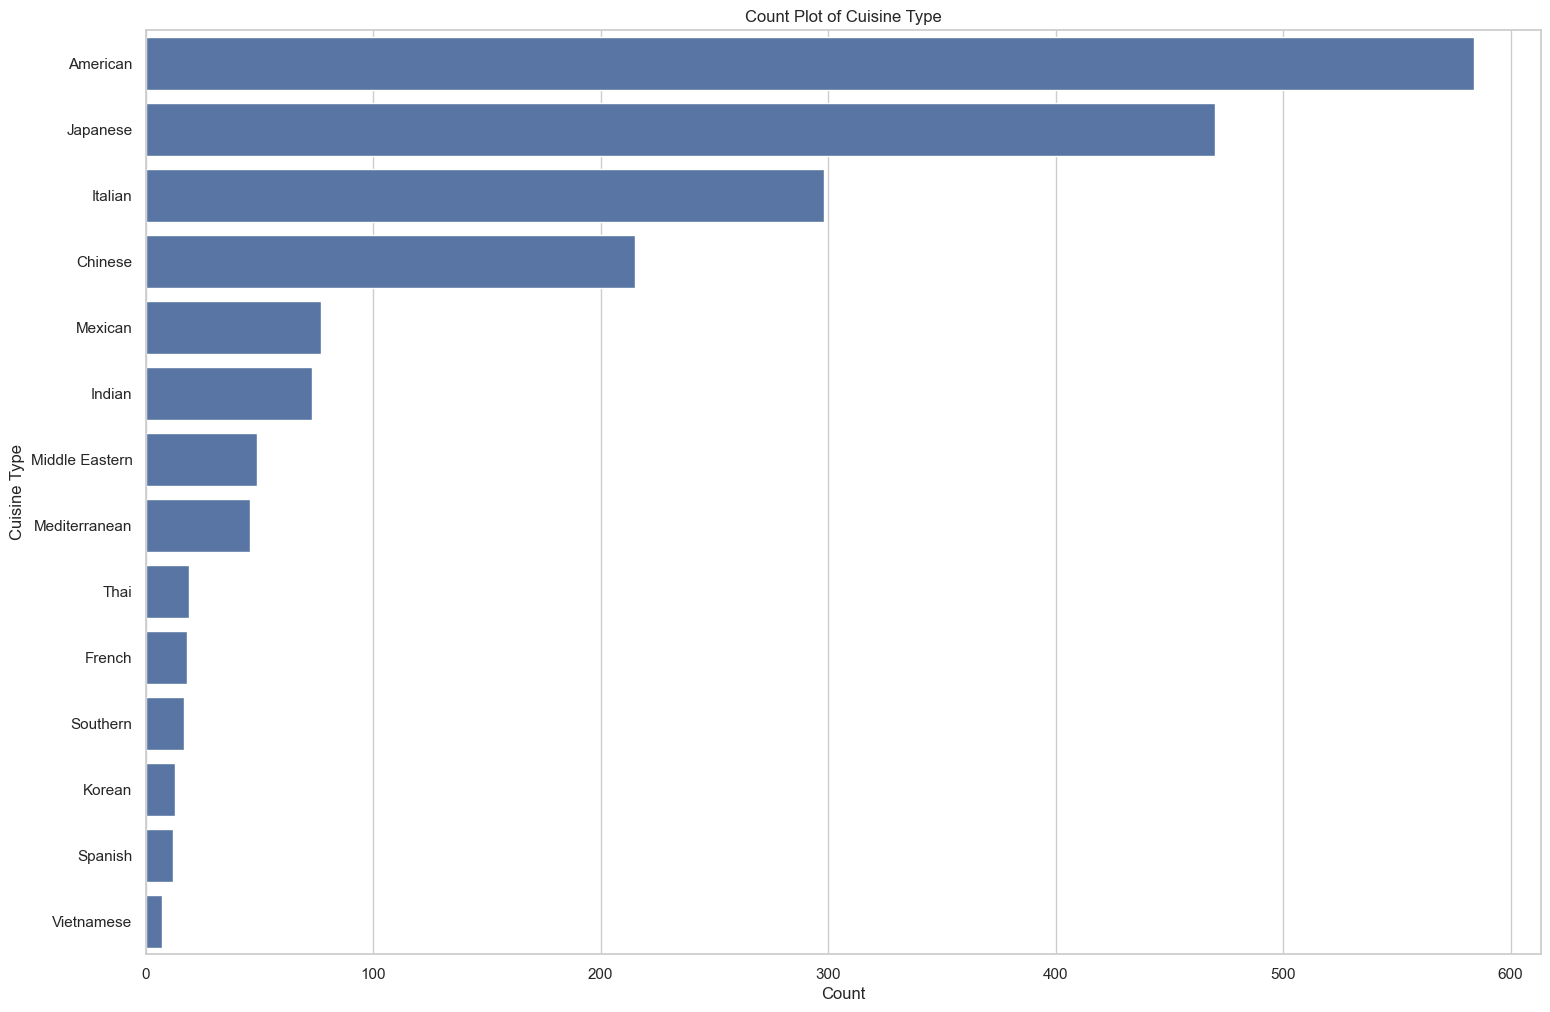

In [12]:
# Count plot for 'cuisine_type'

plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
##plt.subplot(2, 3, 3)
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index)
plt.title('Count Plot of Cuisine Type')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The count plot shows the frequency of each cuisine type. American cuisine is the most frequent, followed by Japanese and Italian cuisines. This suggests that these cuisines are popular among customers. Less frequent cuisines include Korean, Spanish and Vietnamese.

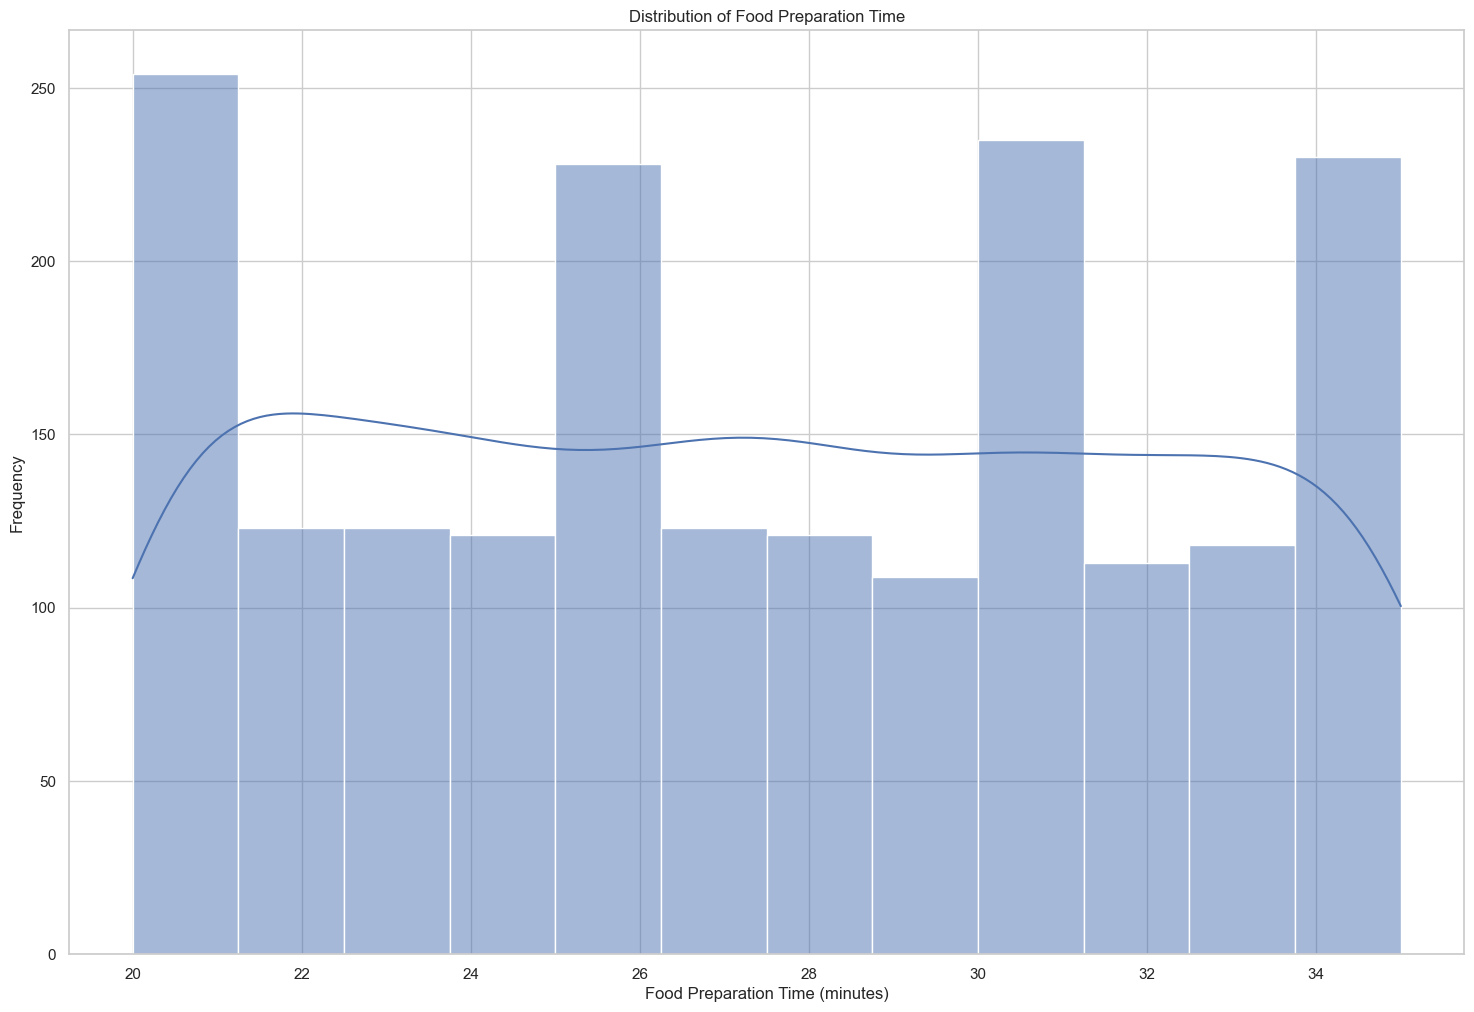

In [13]:
# Histogram for 'food_preparation_time'

plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
###plt.subplot(2, 3, 4)
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The histogram shows that the food preparation time is mostly concentrated between 20 and 35 minutes, with a peak around 27 minutes. This indicates that most orders take about 27 minutes to prepare.

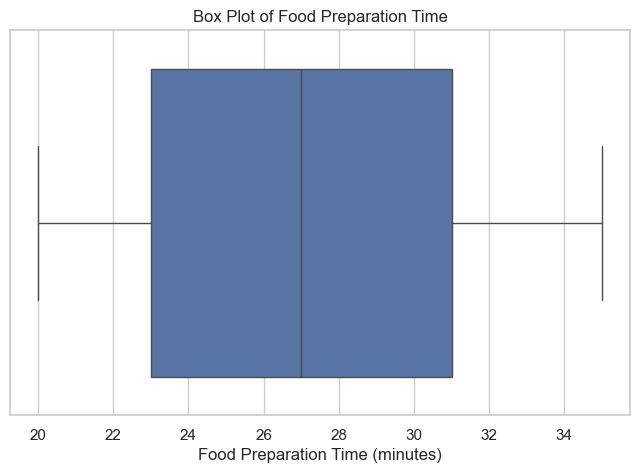

In [14]:
# Ensure 'food_preparation_time' is treated as a numerical column if it is not already
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')

# Plot settings
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Box plot for 'food_preparation_time'
sns.boxplot(x=df['food_preparation_time'], showfliers=True)
plt.title('Box Plot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The box plot shows the median food preparation time is around 27 minutes. The IQR is between approximately 23 and 31 minutes. 

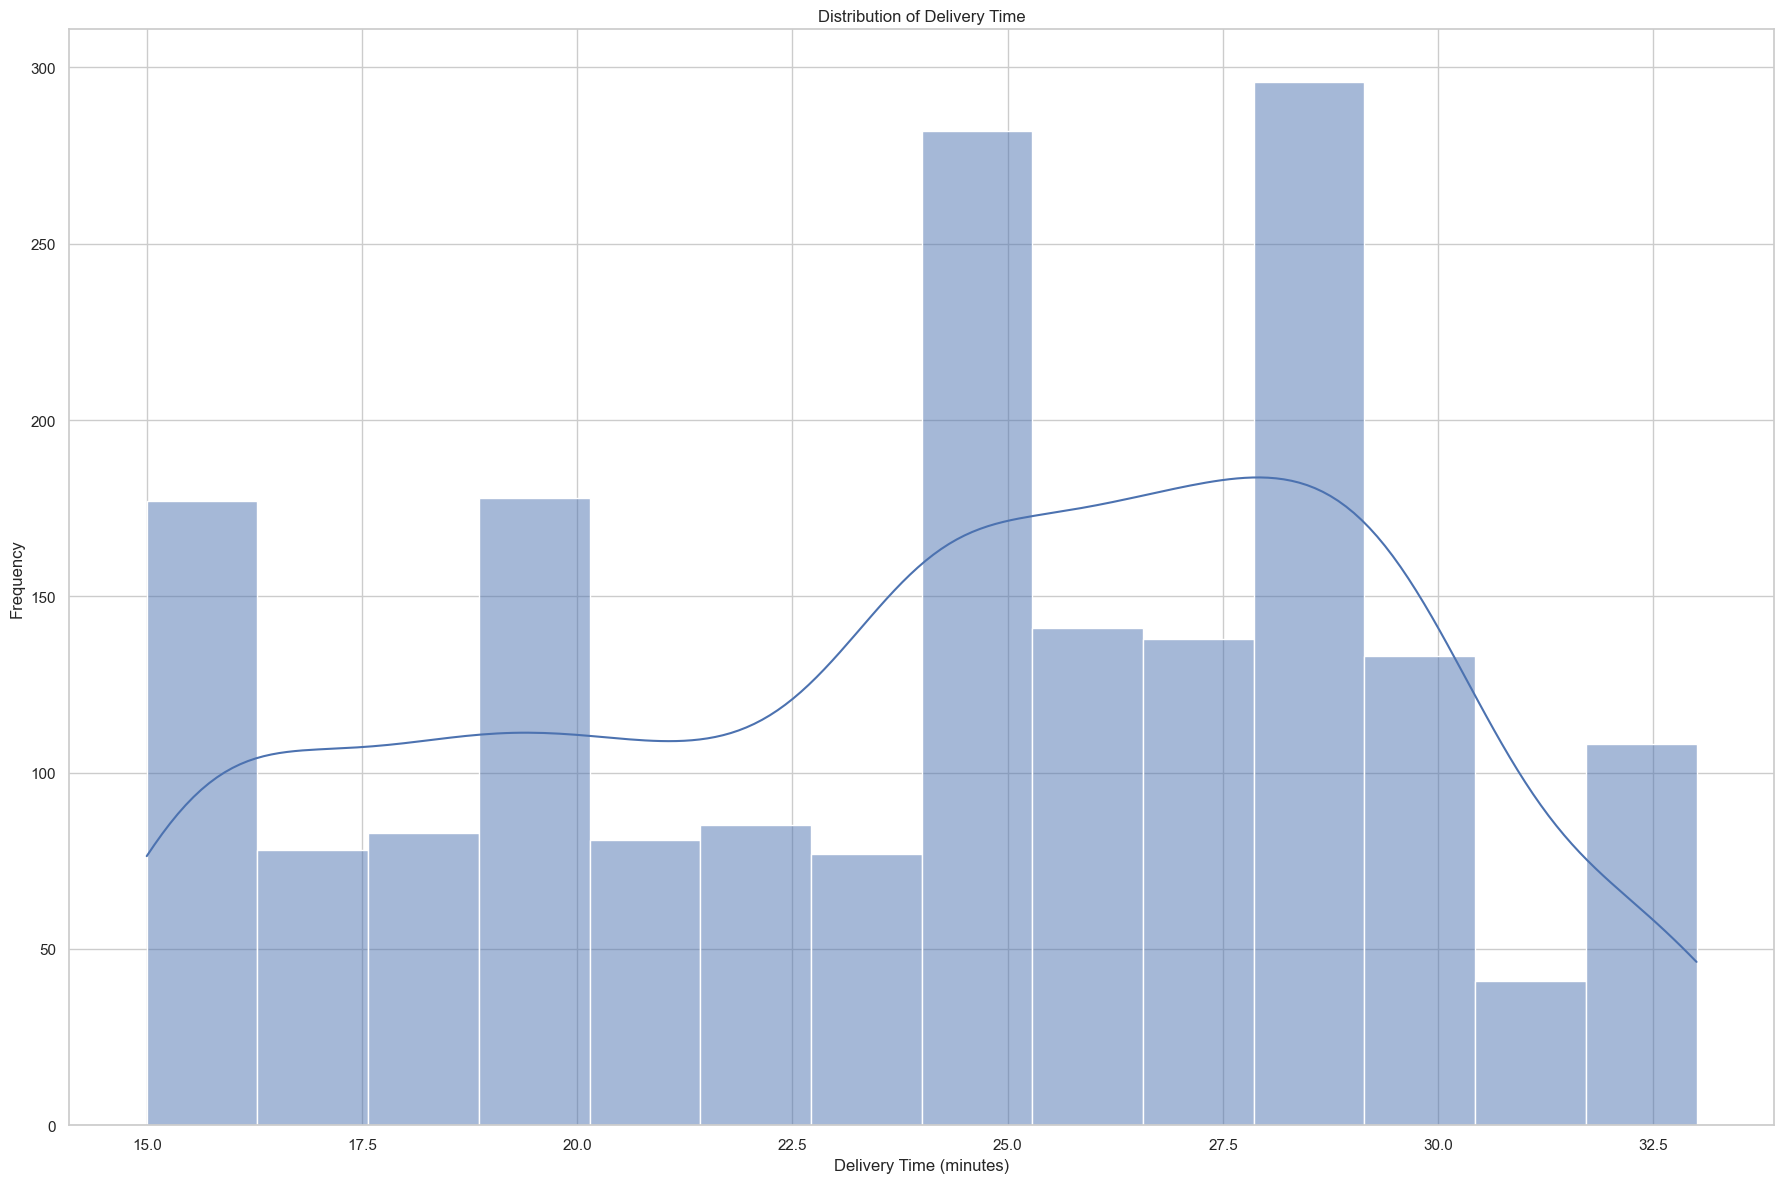

In [15]:
# Histogram for 'delivery_time'

plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
####plt.subplot(2, 3, 6)
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The histogram shows that the delivery time is mostly concentrated between 20 and 30 minutes, with a peak around 25 minutes. This indicates that most orders are delivered within 25 minutes.

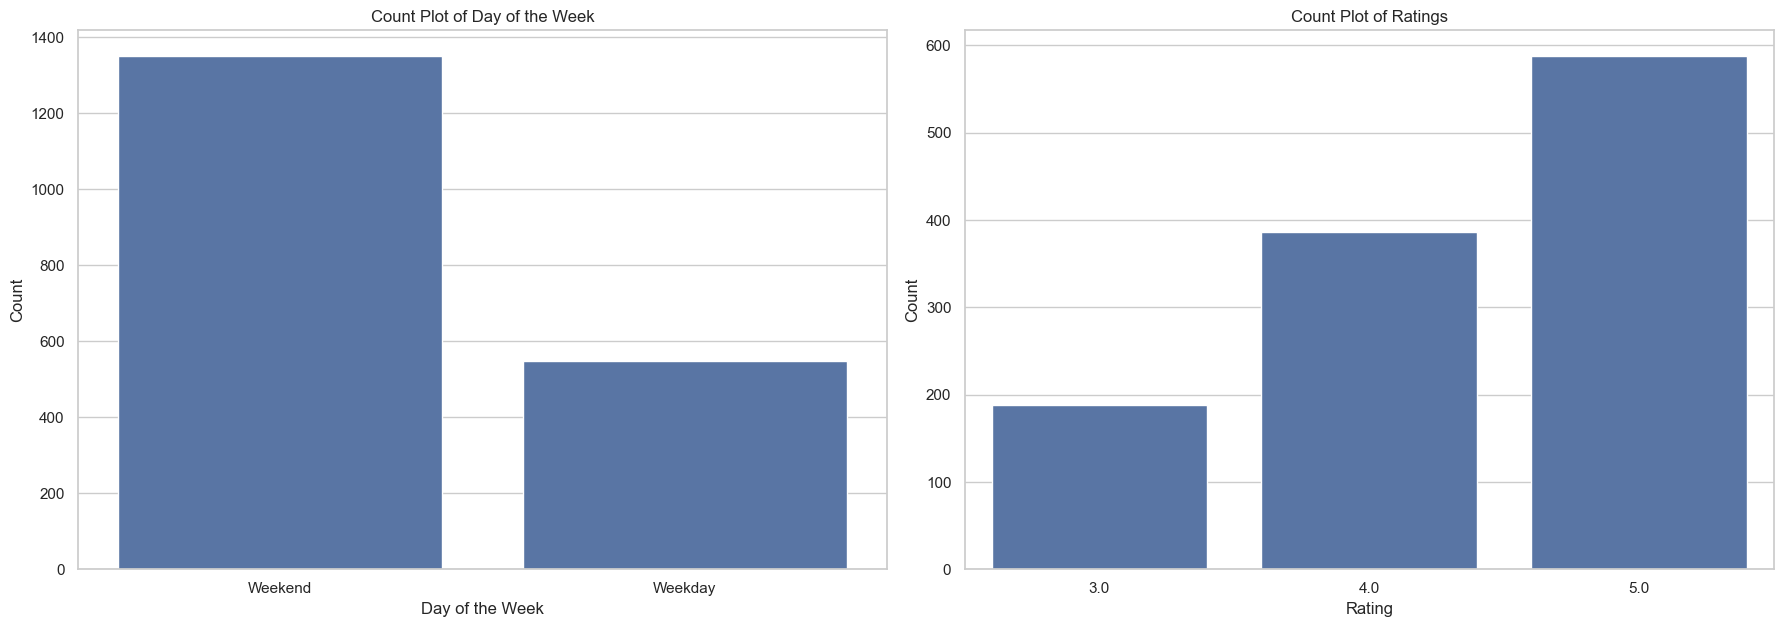

In [18]:
# Additional plots for categorical variables

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

plt.figure(figsize=(18, 12))

# Count plot for 'day_of_the_week'
plt.subplot(2, 2, 1)
sns.countplot(x=df['day_of_the_week'])
plt.title('Count Plot of Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Count plot for 'rating'
plt.subplot(2, 2, 2)
sns.countplot(x=df['rating'])
plt.title('Count Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
###plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The count plot shows the frequency of orders for each day of the week. Orders are fairly evenly distributed across the week, with a slight increase on weekends. This suggests that customers are slightly more likely to place orders on weekends.

* The count plot shows the frequency of each rating. Most ratings are concentrated around 4 and 5, indicating generally high customer satisfaction. There are fewer ratings below 4, suggesting that most customers are satisfied with their orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Top 5 restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


C:\Users\34673\AppData\Local\Temp\ipykernel_22044\1416724299.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index, palette='viridis')


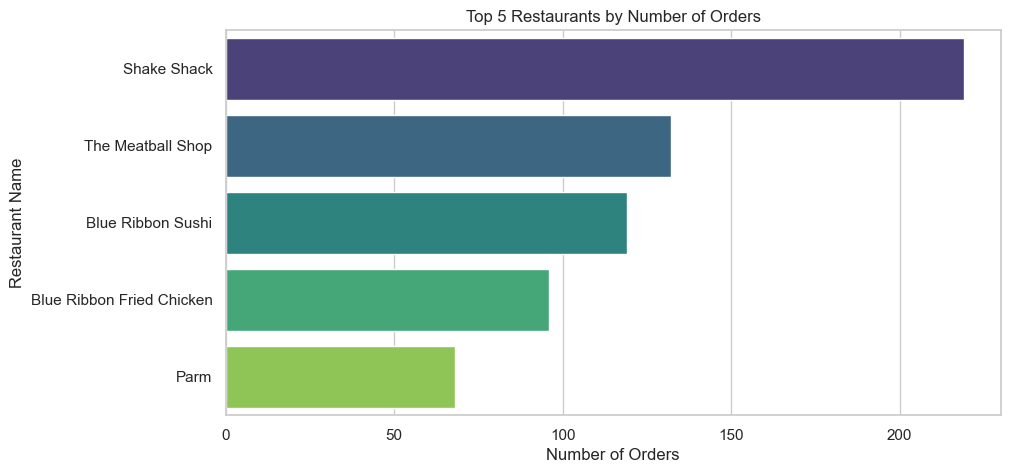

In [19]:
# Write the code here
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants in terms of the number of orders received:")
print(top_5_restaurants)

# Plot the top 5 restaurants
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index, palette='viridis')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()


#### Observations:
The top 5 restaurants in terms of the number of orders received are:
- Shake Shack has the highest number of orders with over 200.
- The Meatball Shop has the second highest number of orders with almost 150.
- Parm received the least number of orders with only an excess of 50.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [57]:
# Write the code here
import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Filter the data for weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")

The most popular cuisine on weekends is: American


#### Observations:
- American is the most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [58]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Filter the data for weekdays
total_orders = len(df)
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"The percentage of orders that cost more than 20 dollars is: {percentage_above_20:.2f}%")

The percentage of orders that cost more than 20 dollars is: 29.24%


#### Observations:
- The percentage of orders that cost more than 20 dollars is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [68]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean delivery time in minutes
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:

* The mean order delivery time is: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [69]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter the data for the most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Calculate the number of orders for each customer
print("Top 3 most frequent customers and the number of orders they placed:")
print(top_customers)

Top 3 most frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
Top 3 most frequent customers and the number of orders they placed:
    
   -  Customer_id 52832 ordered 13
   -  Customer_id 47124 ordered 10
   -  Customer_id 44795 ordered  9




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [6]:
# Write the code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check the first few rows of the dataframe to understand the structure
print(df.head())



   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                     25   
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday     4.0                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


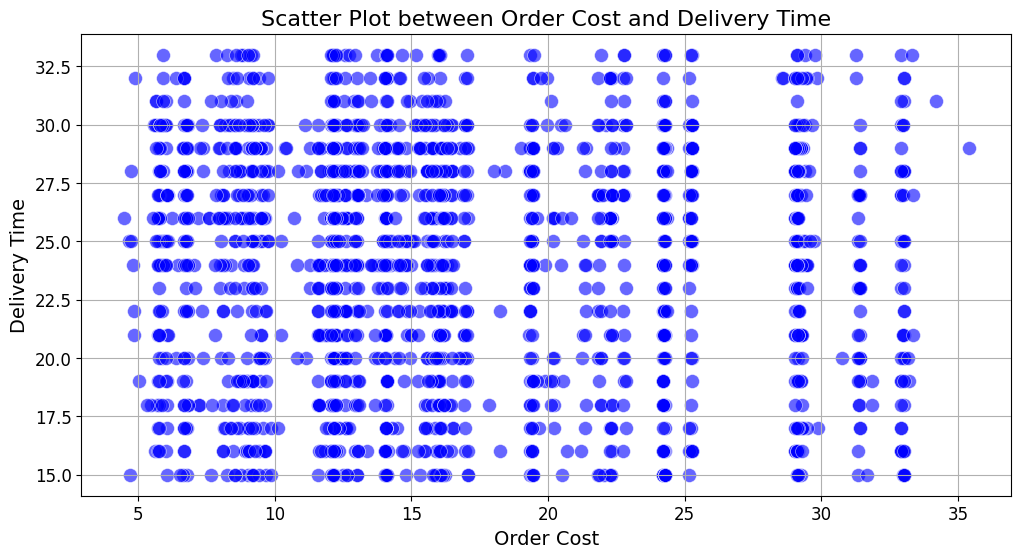

In [7]:
# Scatter plot between 'cost_of_the_order' and 'delivery_time'

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Scatter plot between 'cost_of_the_order' and 'delivery_time'
if 'cost_of_the_order' in df.columns and 'delivery_time' in df.columns:
    plt.figure(figsize=(12, 6))  # Increase figure size for better readability
    sns.scatterplot(x='cost_of_the_order', y='delivery_time', data=df, s=100, color='blue', alpha=0.6, edgecolor='w', linewidth=0.5)
    plt.title('Scatter Plot between Order Cost and Delivery Time', fontsize=16)
    plt.xlabel('Order Cost', fontsize=14)
    plt.ylabel('Delivery Time', fontsize=14)
    plt.grid(True)  # Add grid lines for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('output.jpg', bbox_inches='tight')
    plt.show()
else:
    print("Columns 'cost_of_the_ordert' and/or 'delivery_time' not found in the dataframe.")

#### Observations:

*  The scatter plot shows the relationship between the cost of the order and the delivery time.

*  Each point represents an individual order, with the x-coordinate representing the order cost and the y-coordinate representing the delivery time.

*  The plot helps in identifying any potential correlation between order cost and delivery time.

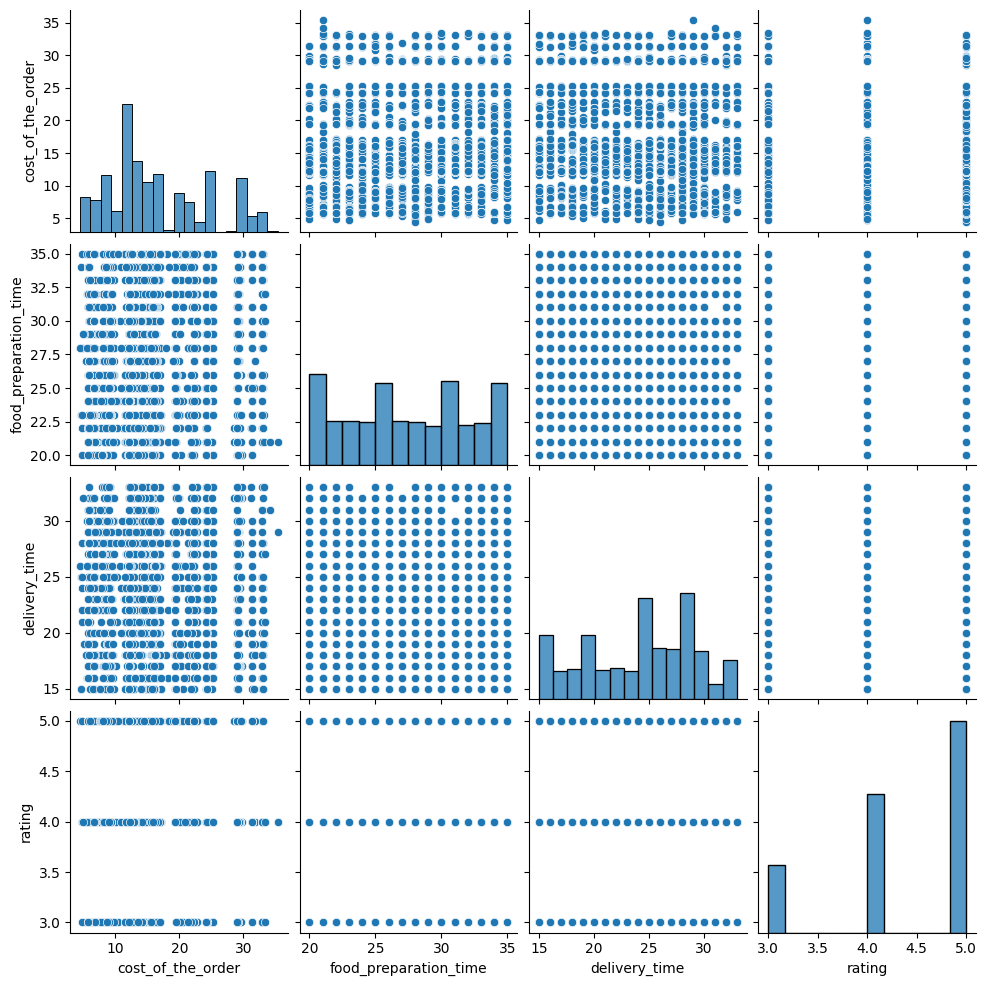

In [8]:
# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Pair plot for numerical columns
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
sns.pairplot(df[numerical_columns])
plt.savefig('output.jpg', bbox_inches='tight')
plt.show()

#### Observations:

*  The diagonal elements of the pair plot display histograms representing the distribution of each numerical variable. Most orders cost between $10 and $20, with a few exceeding $30. Food preparation time is primarily between 20 and 35 minutes, while delivery time ranges from 20 to 30 minutes. Ratings are mostly concentrated around 4 and 5, indicating generally high customer satisfaction.

*  The scatter plots illustrate pairwise relationships between numerical variables. A positive correlation exists between cost_of_the_order and food_preparation_time, with higher-cost orders taking longer to prepare. No clear correlation is observed between order cost and delivery time, order cost and rating, or food preparation time and delivery time, as the points are widely scattered. However, a slight negative correlation is noted between food preparation time and rating, as well as between delivery time and rating, indicating that longer preparation or delivery times tend to result in slightly lower ratings.





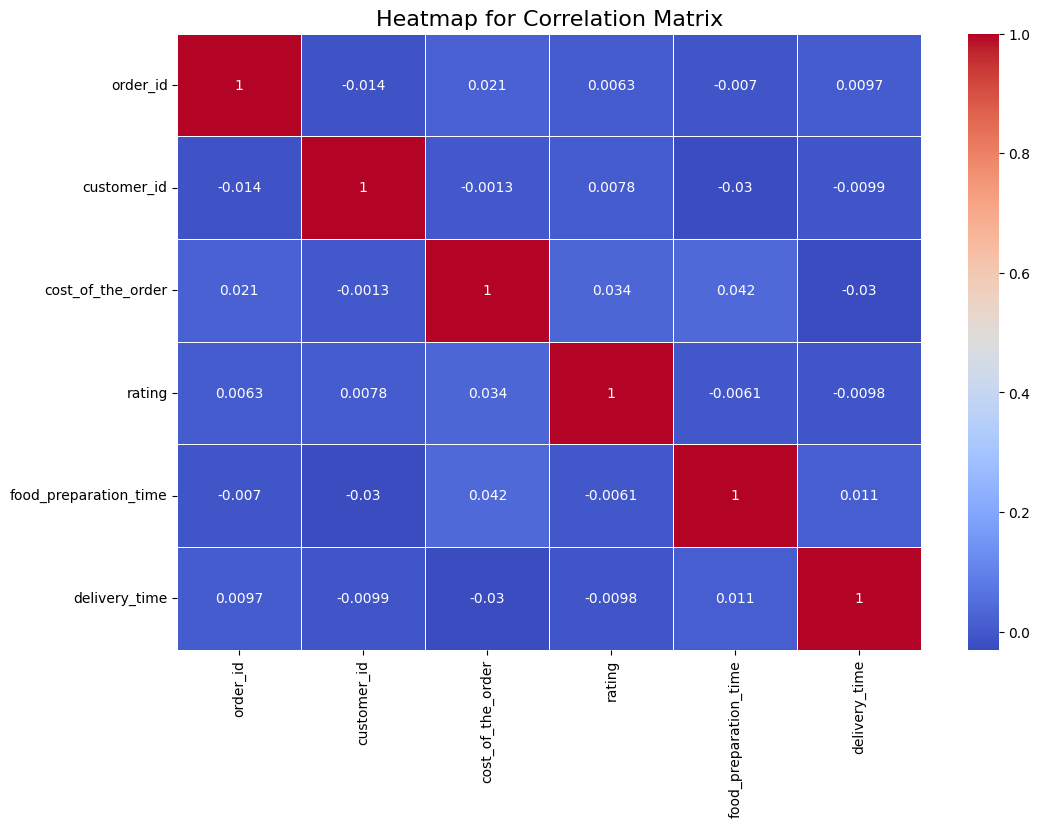

In [9]:
# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Check if there are any numeric columns
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap for Correlation Matrix', fontsize=16)
    plt.savefig('output.jpg', bbox_inches='tight')
    plt.show()
else:
    print("No numerical columns found for correlation matrix.")

#### Observations:

*  There is a strong positive correlation between cost_of_the_order and food preparation time, suggesting that higher-cost dishes take longer to prepare. 

*  A slight negative correlation exists between delivery time and rating, as well as between food preparation time and rating, indicating that longer wait times may lead to lower customer satisfaction. 

*  No significant correlation is observed between delivery time and food preparation time or between cost_of_the_order and delivery time, implying that food preparation duration does not necessarily impact delivery time, nor does cost_of_the_order influence it.





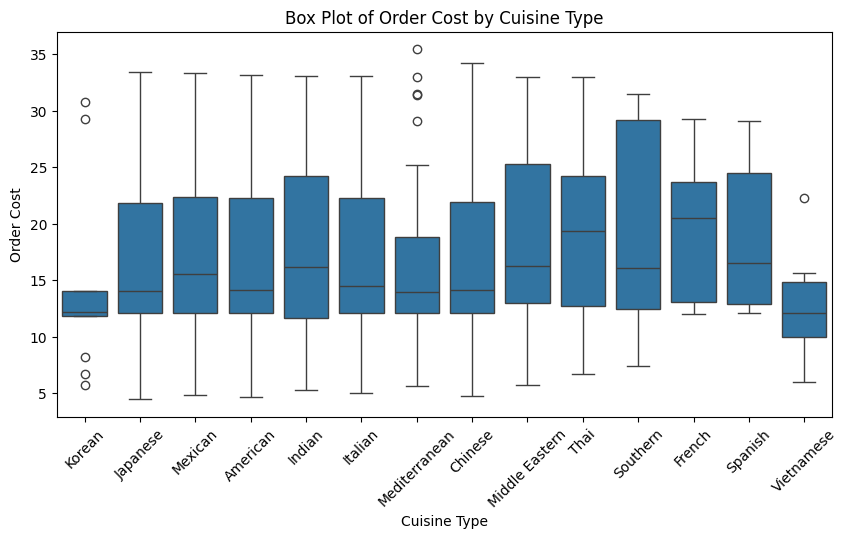

In [10]:
# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Box plot for 'cost_of_the_order' by 'cuisine_type'
if 'cost_of_the_order' in df.columns and 'cuisine_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
    plt.title('Box Plot of Order Cost by Cuisine Type')
    plt.xlabel('Cuisine Type')
    plt.ylabel('Order Cost')
    plt.xticks(rotation=45)
    plt.savefig('output.jpg', bbox_inches='tight')
    plt.show()
else:
    print("Columns 'cost_of_the_ordert' and/or 'cuisine_type' not found in the dataframe.")

#### Observations:

*  The box plot illustrates the distribution of order costs across different cuisine types. The central line represents the median, while the box edges indicate the interquartile range (IQR), covering the middle 50% of the data. Whiskers extend to values within 1.5 times the IQR from the quartiles, with points beyond them classified as outliers.

*  There are several outliers in the data, particularly for cuisines like Korean, Mediterranean, and Vietnamese. These outliers represent orders with high or low costs compared to the majority of the data.

*  The variation in order costs can be observed across different cuisines. Some cuisines may have a wider range of order costs, while others may have more consistent pricing.









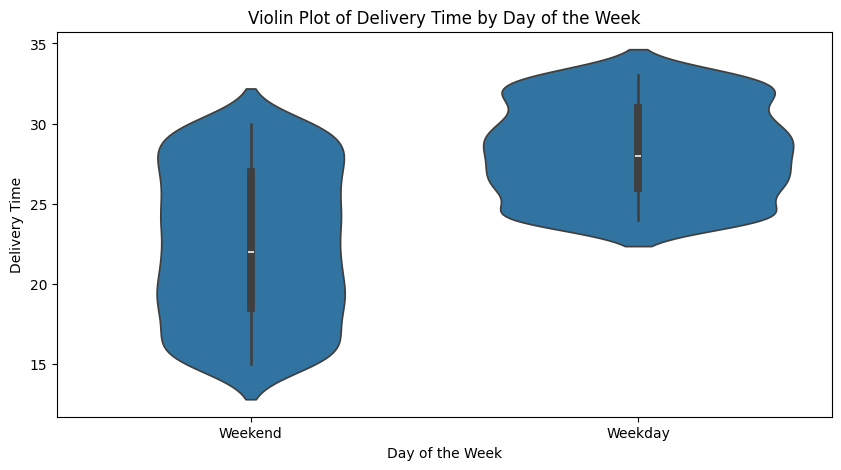

In [11]:
# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Violin plot for 'delivery_time' by 'day_of_the_week'
if 'delivery_time' in df.columns and 'day_of_the_week' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='day_of_the_week', y='delivery_time', data=df)
    plt.title('Violin Plot of Delivery Time by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Delivery Time')
    plt.savefig('output.jpg', bbox_inches='tight')
    plt.show()
else:
    print("Columns 'delivery_time' and/or 'day_of_the_week' not found in the dataframe.")

#### Observations:

*  The violin plot shows the distribution of delivery times for weekdays and weekends.

*  The width of the violin plot at different y-values indicates the density of data points at those values. Wider sections represent higher density.

*  The plot allows for a visual comparison of delivery times between weekdays and weekends. You can observe the central tendency (median) and the spread (range) of delivery times for each category.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [1]:
# Write the code here
import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Ensure 'rating' is treated as a numerical column if it is not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name and calculate the count and mean of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter the restaurants that meet the criteria
promotional_offers = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the restaurants fulfilling the criteria
print(promotional_offers)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:

- There are 4 restaurants that meet the criteria to get the promotional offer. These restaurants have a rating count of more than 50 and an average (mean) rating greater than 4. These restaurants are worth considering for the promotional offer: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [4]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Define a function to calculate the commission based on the order cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate the commission for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total revenue
total_revenue = df['commission'].sum()

# Display the total revenue
print(f'Total revenue generated by the company: ${total_revenue:.2f}')

Total revenue generated by the company: $6166.30


#### Observations:

- The total revenue generated by the company across all orders is approximately $6166.30. This revenue is derived from the commission paid on orders with cost greater than 5 dollars. The company should consider implementing a tiered pricing strategy to increase the commission for orders with cost greater than 20 dollars. Additionally, the company can encourage customers to leave feedback to improve the delivery times and overall customer satisfaction.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [5]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Calculate the total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Determine the number of orders where the total time is greater than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Calculate the percentage of such orders
total_orders = df.shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Display the percentage
print(f'The percentage of orders that take more than 60 minutes to get delivered: {percentage_above_60:.2f}%')

The percentage of orders that take more than 60 minutes to get delivered: 10.54%


#### Observations:

- The company has approximately 10.54% of its orders taking more than 60 minutes to get delivered from the time the order is placed. This suggests that the company may need to optimize the delivery process to reduce the overall delivery time. The company can consider implementing a more efficient delivery route, improving communication with the delivery personnel, or providing additional resources to reduce the time spent on food preparation and delivery. Additionally, the company can encourage customers to leave feedback to improve the delivery times and overall customer satisfaction.








### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [6]:
# Write the code here

import pandas as pd

# Read the data
df = pd.read_csv('foodhub_order.csv')

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Display the mean delivery times
print(f'Mean delivery time on weekdays: {mean_delivery_time_weekday:.2f} minutes')
print(f'Mean delivery time on weekends: {mean_delivery_time_weekend:.2f} minutes')


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:

- The mean delivery time on weekdays is approximately 28.34 minutes, while the mean delivery time on weekends is approximately 22.47 minutes. This suggests that the company may need to optimize the delivery process to reduce the overall delivery time during weekdays. The company can consider implementing a more efficient delivery route, improving communication with the delivery personnel, or providing additional resources to reduce the time spent on food preparation and delivery. Additionally, the company can encourage customers to leave feedback to improve the delivery times and overall customer satisfaction.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The data consists of 1898 orders with various attributes such as restaurant name, cuisine type, cost, day of the week, rating, food preparation time, and delivery time.

*  The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Parm, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi.

*  The most popular cuisine on weekends is American, indicating a high demand for American food during weekends.

*  Approximately 29.24% of the orders cost more than 20 dollars, indicating a significant portion of high-value orders.

*  The mean order delivery time is approximately 24.16 minutes. The delivery time varies between weekdays and weekends, with potential differences in mean delivery times.

*  The top 3 most frequent customers have placed 13, 10, and 9 orders, respectively. There are no missing ratings in the dataset, indicating that all orders have been rated by customers.

*  Four restaurants meet the criteria for promotional offers, having a rating count of more than 50 and an average rating greater than 4. These restaurants are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

*  The total revenue generated by the company across all orders is approximately $6166.30, based on the commission rates applied to orders with costs greater than 5 dollars.

*  A certain percentage of orders or about 10.54%, take more than 60 minutes to get delivered from the time the order is placed, indicating potential areas for improvement in delivery efficiency.


### Recommendations:

*  Focus on improving the delivery times, especially for orders that take more than 60 minutes. Implement strategies to optimize food preparation and delivery processes.
Encourage customers to leave feedback and ratings to gather more insights into their experiences and identify areas for improvement.

*  Provide promotional offers to the top-rated restaurants (Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop) to attract more customers and increase order volumes.
Consider offering discounts or loyalty programs to frequent customers to encourage repeat orders and enhance customer retention.

*  Given the popularity of American cuisine on weekends, consider promoting American restaurants and offering special weekend deals to attract more customers.
Analyze the demand for other cuisines and tailor marketing strategies to promote less popular cuisines during weekdays.

*  Implement a tiered pricing strategy to increase the commission for high-value orders (cost greater than 20 dollars) to boost revenue.
Explore additional revenue streams, such as premium delivery services or partnerships with high-demand restaurants.

*  Analyze the correlation between order cost and food preparation time to identify potential inefficiencies and optimize restaurant operations.
Use data-driven insights to streamline delivery routes and reduce delivery times, especially during peak hours and weekends.
